In [45]:
import os

In [46]:
os.chdir('/content/drive/My Drive/Mask Detector CNN CV')

In [47]:
images = np.load('/content/drive/My Drive/Mask Detector CNN CV/images.npy')
labels = np.load('/content/drive/My Drive/Mask Detector CNN CV/labels.npy' )

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_X,test_X,train_y,test_y = train_test_split(images,labels,test_size=0.25,random_state = 0)

In [50]:
train_X.shape

(941, 112, 112, 1)

In [51]:
train_y.shape

(941, 2)

In [52]:
test_X.shape

(314, 112, 112, 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,SpatialDropout2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [54]:
import tensorflow as tf
num_classes = 2
batch_size= 32
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 110, 110, 64)      640       
_________________________________________________________________
activation_6 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_7 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)            

In [56]:
from keras.optimizers import Adam
epochs = 50
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

fitted_model = model.fit(train_X,train_y,epochs=epochs,validation_split=0.25)

Epoch 1/50
23/23 [==============================] - 1s 31ms/step - loss: 0.6719 - accuracy: 0.5759 - val_loss: 0.6448 - val_accuracy: 0.6102
Epoch 2/50
23/23 [==============================] - 1s 24ms/step - loss: 0.6122 - accuracy: 0.6652 - val_loss: 0.5837 - val_accuracy: 0.6907
Epoch 3/50
23/23 [==============================] - 1s 24ms/step - loss: 0.5228 - accuracy: 0.7759 - val_loss: 0.5384 - val_accuracy: 0.7246
Epoch 4/50
23/23 [==============================] - 1s 25ms/step - loss: 0.4732 - accuracy: 0.7787 - val_loss: 0.5965 - val_accuracy: 0.6441
Epoch 5/50
23/23 [==============================] - 1s 25ms/step - loss: 0.4609 - accuracy: 0.7816 - val_loss: 0.6286 - val_accuracy: 0.6102
Epoch 6/50
23/23 [==============================] - 1s 24ms/step - loss: 0.4971 - accuracy: 0.7277 - val_loss: 0.4689 - val_accuracy: 0.8136
Epoch 7/50
23/23 [==============================] - 1s 24ms/step - loss: 0.4206 - accuracy: 0.8099 - val_loss: 0.4452 - val_accuracy: 0.8475
Epoch 8/50
23

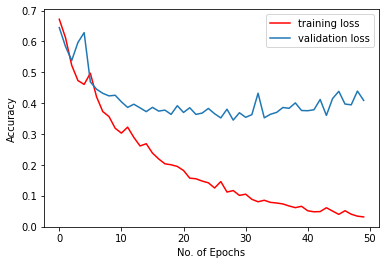

In [59]:
import matplotlib.pyplot as plt

plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

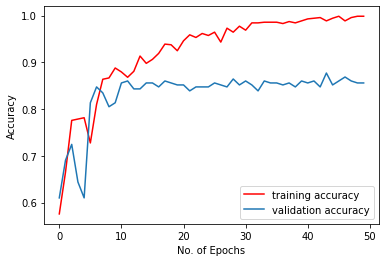

In [60]:

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
model.save('mask_detector_cnn.h5')

In [62]:
from google.colab import files
files.download('mask_detector_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>